# Workshop: Building my first simple model

## Exploratory Data Analysis on Life Expectancy Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kstest

In [2]:
df = pd.read_csv('../data/Life Expectancy Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
# Exploring missing data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# Dividing based on data types for future analysis
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns]
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Year']

In [7]:
len(numerical_cols)

19

In [8]:
numerical_cols

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [9]:
# Exploring unique values in categorical data
for col in categorical_cols:
    print(f'Unique value of column {col}:', df[col].unique())
    print()

Unique value of column Country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indones

In [10]:
# Looking into descriptive statistics for numerical data and rotating because there are too many cols
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03
Polio,2919.0,8.255019e+01,2.342805e+01,3.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


*Short notes based on descriptive statistics*

`Life expectancy`:  
- range of feature - from 36.3 to 89
- mean - 69
- median (50%) - 72.1
- standard deviation - 9.5

The distribution appears slightly left-skewed, as the mean is a bit lower than the median. No strong indication of outliers, but the range from 36.3 to 89 suggests a few low or high extremes. Most values lie between 63.1 (25%) and 75.7 (75%), indicating a concentration of data in this range.

`Adult Mortality`
- wide range of feature from 1 to 723
- mean - 164
- median (50%) - 144
- standard deviation - 124.2

The distribution is positively skewed, as the mean is higher than the median and the max value is very large. Data is more spread out with high variability. Most of the data is in range from 74 to 228.

`infant deaths`
- range of feature - from 0 to 180
- mean - 30.3
- median (50%) - 30
- standard deviation - 117

It seems data is more spread and there is an indication of outliers. Most of the data is in range from 0 to 220 with a lot of extremes. The disctribution is right-skewed

`Alchol`
- range of feature - from 0.01 to 17.87
- mean - 4.6
- median (50%) - 3.76
- standard deviation - 4.05

`Percentage expenditure`
- Range: 0 – 19,479.91  
- Mean: 738.25  
- Median (50%): 64.91  
- Std. dev.: 1,987.91  

Highly right-skewed with extreme outliers. Most countries < 441.53.

`Hepatitis B`
- Range: 1 – 99  
- Mean: 80.94  
- Median (50%): 92  
- Std. dev.: 25.07  

Slight left skew. Most countries above 77% coverage; some very low.

`Measles`
- Range: 0 – 212,183  
- Mean: 2,419.6  
- Median (50%): 17  
- Std. dev.: 11,467  

Extremely right-skewed. Most countries near zero but a few with massive counts.

`BMI`
- Range: 1 – 87.3  
- Mean: 38.32  
- Median (50%): 43.5  
- Std. dev.: 20.04  

Slight left skew, wide spread. Most between 19.3 and 56.2.

`Under-five deaths`
- Range: 0 – 2,500  
- Mean: 42.04  
- Median (50%): 4  
- Std. dev.: 160.45  

Highly right-skewed. Most between 0 and 28, few extreme outliers.

`Polio`
- Range: 3 – 99  
- Mean: 82.55  
- Median (50%): 93  
- Std. dev.: 23.43  

Mostly high rates, slightly left-skewed. Few low-coverage countries.

`Total expenditure`
- Range: 0.37 – 17.6  
- Mean: 5.94  
- Median (50%): 5.76  
- Std. dev.: 2.50  

Fairly symmetric, most between 4.26 and 7.49.

`Diphtheria`
- Range: 2 – 99  
- Mean: 82.32  
- Median (50%): 93  
- Std. dev.: 23.72  

Similar to Polio: generally high rates with a few low-coverage cases.

`HIV/AIDS`
- Range: 0.1 – 50.6  
- Mean: 1.74  
- Median (50%): 0.1  
- Std. dev.: 5.08  

Extremely right-skewed; most countries near zero prevalence.

`GDP`
- Range: 1.68 – 119,172.7  
- Mean: 7,483.16  
- Median (50%): 1,766.95  
- Std. dev.: 14,270.17  

Heavily right-skewed. Few very high-income countries inflate the mean.

`Population`
- Range: 34 – 1,293,859,000  
- Mean: 12,753,380  
- Median (50%): 1,386,542  
- Std. dev.: 61,012,100  

Extremely right-skewed due to a few very large populations.

`Thinness 1–19 years`
- Range: 0.1 – 27.7  
- Mean: 4.84  
- Median (50%): 3.3  
- Std. dev.: 4.42  

Slight right skew with few high outliers.

`Thinness 5–9 years`
- Range: 0.1 – 28.6  
- Mean: 4.87  
- Median (50%): 3.3  
- Std. dev.: 4.51  

Similar to 1–19 years: mostly low values, few high outliers.

`Income composition of resources`
- Range: 0 – 0.948  
- Mean: 0.6276  
- Median (50%): 0.677  
- Std. dev.: 0.2109  

Slight left skew, most between 0.493 and 0.779.

`Schooling`
- Range: 0 – 20.7  
- Mean: 11.99  
- Median (50%): 12.3  
- Std. dev.: 3.36  

Fairly symmetric. Most between 10.1 and 14.3; zeros may be missing data.

**Looking closer at distribution**

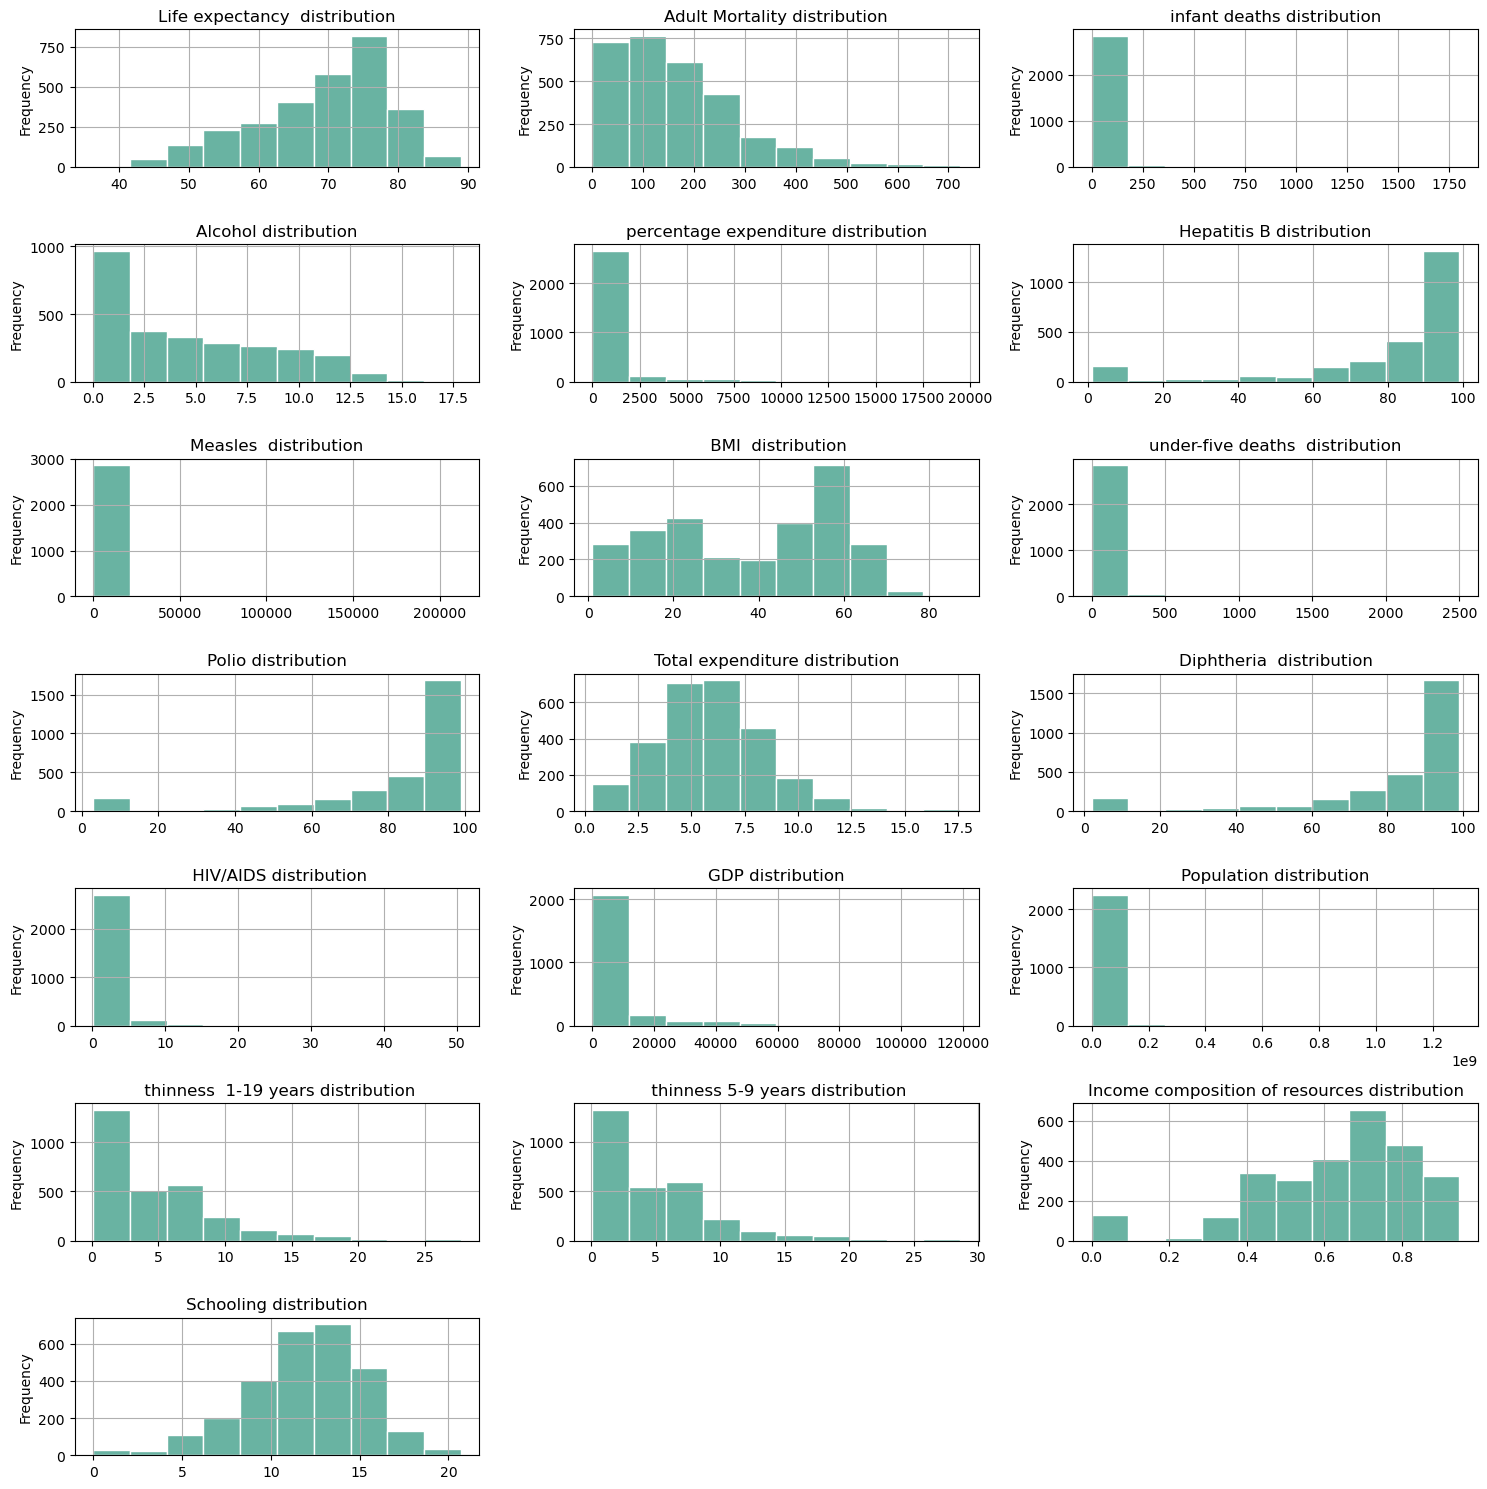

In [11]:
ncols = 3
nrows = len(numerical_cols) // ncols + 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df[numerical_cols].columns):
    
    df[column].hist(ax=axes[i], 
                    edgecolor='white', 
                    color='#69b3a2' 
                   )
    
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_ylabel('Frequency') 

# Making visible only 
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)   # or: ax.remove()

plt.tight_layout()
plt.show()

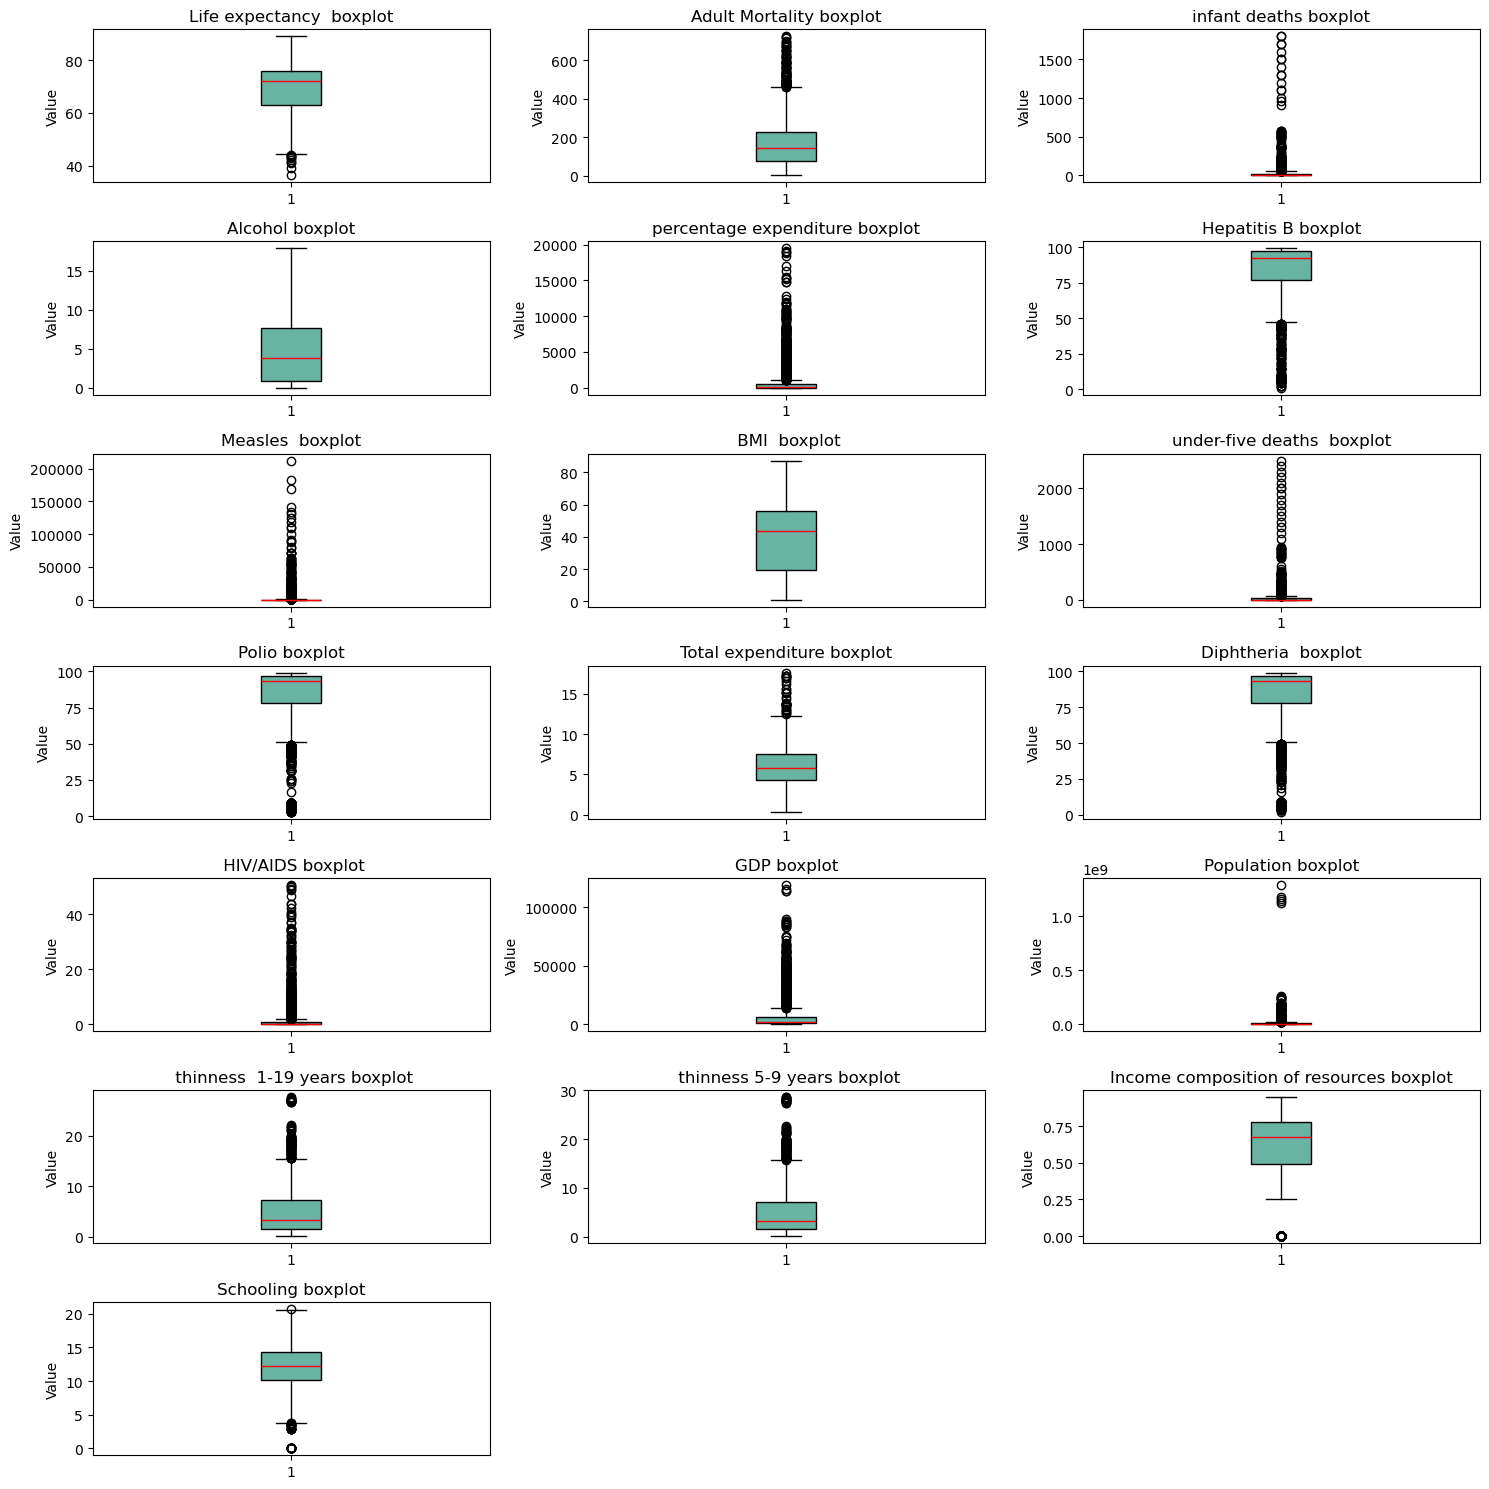

In [12]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.ravel()

# Plot the 19 boxplots
for i, column in enumerate(df[numerical_cols].columns):
    axes[i].boxplot(df[column].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#69b3a2', color='black'),
                    medianprops=dict(color='red'))
    axes[i].set_title(f'{column} boxplot')
    axes[i].set_ylabel('Value')

# Hide leftover axes
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

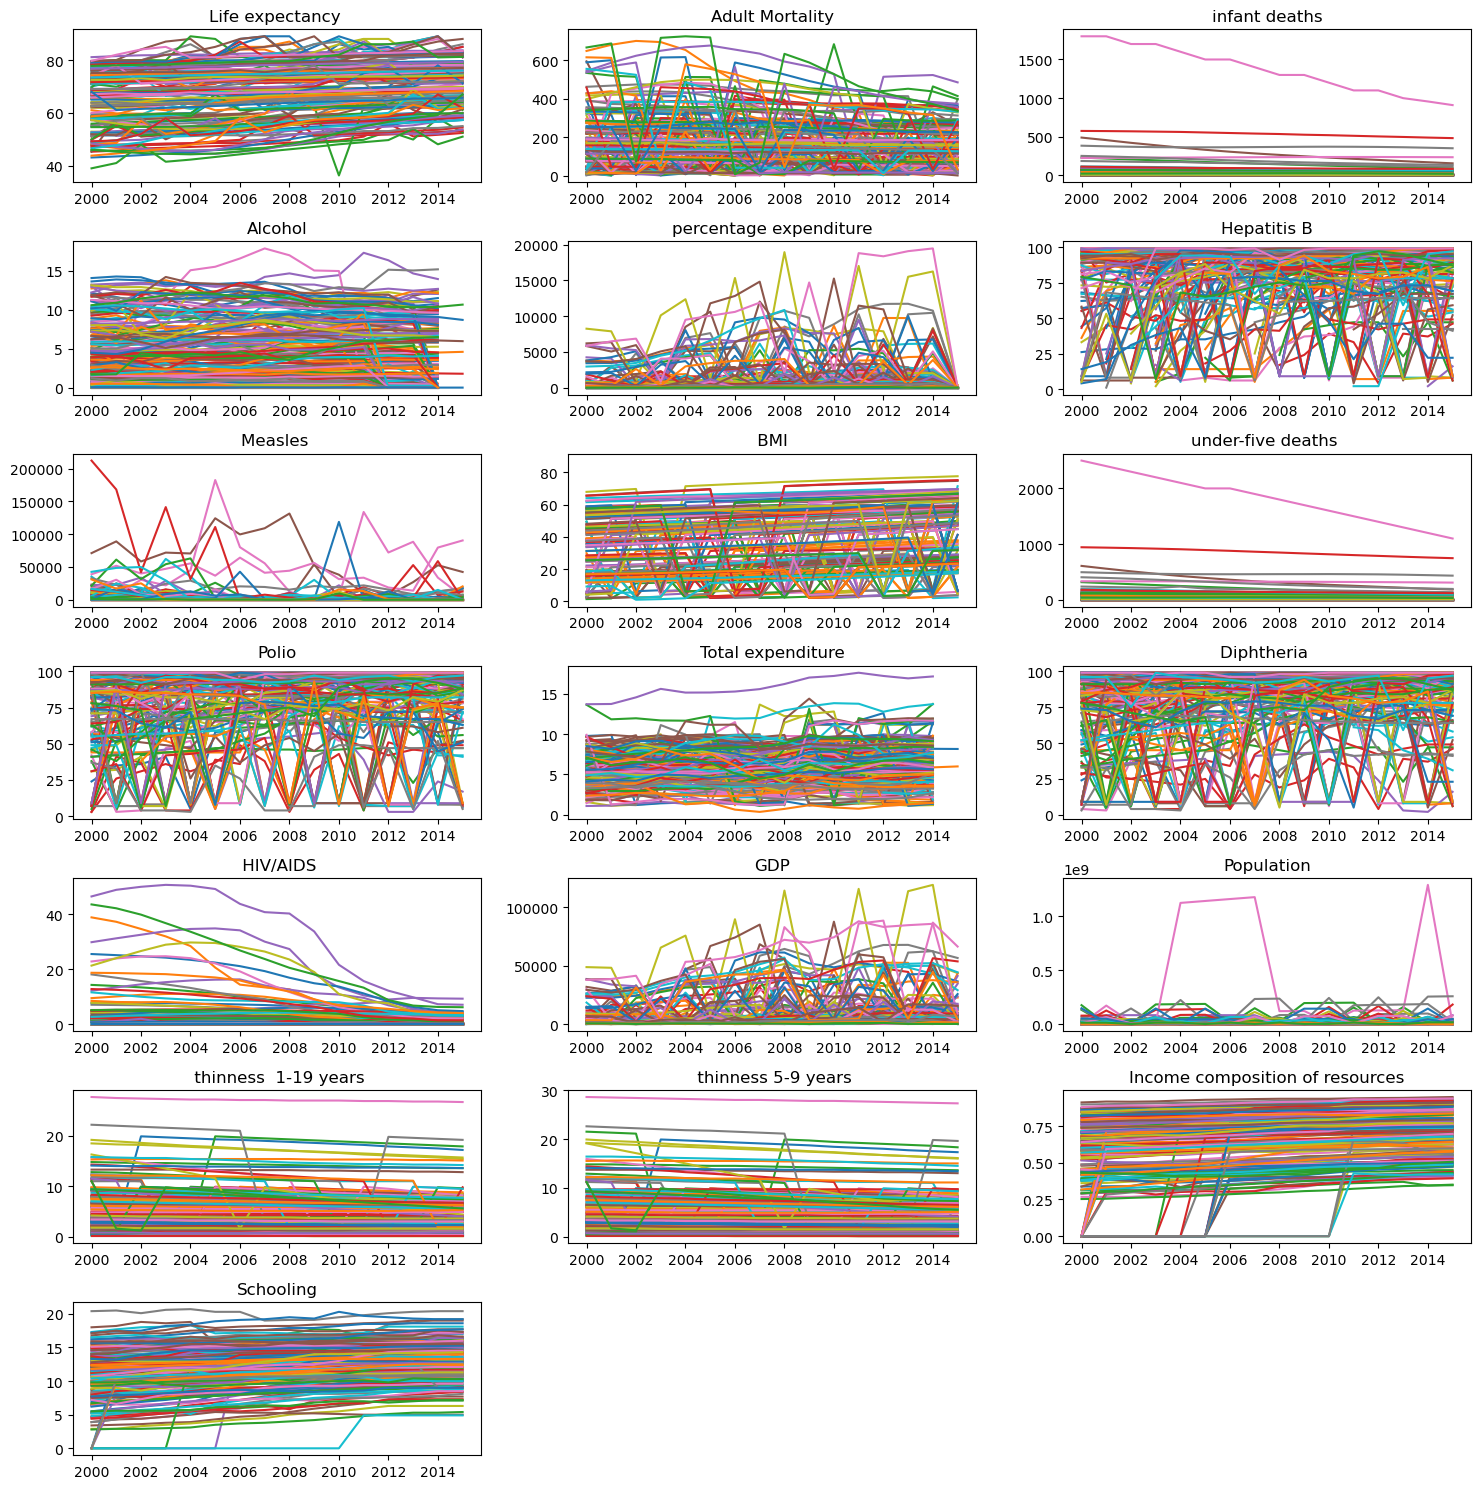

In [13]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        axes[i].plot(country_data['Year'], country_data[col], label=country)
    axes[i].set_title(col)

# Убираем пустые оси
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

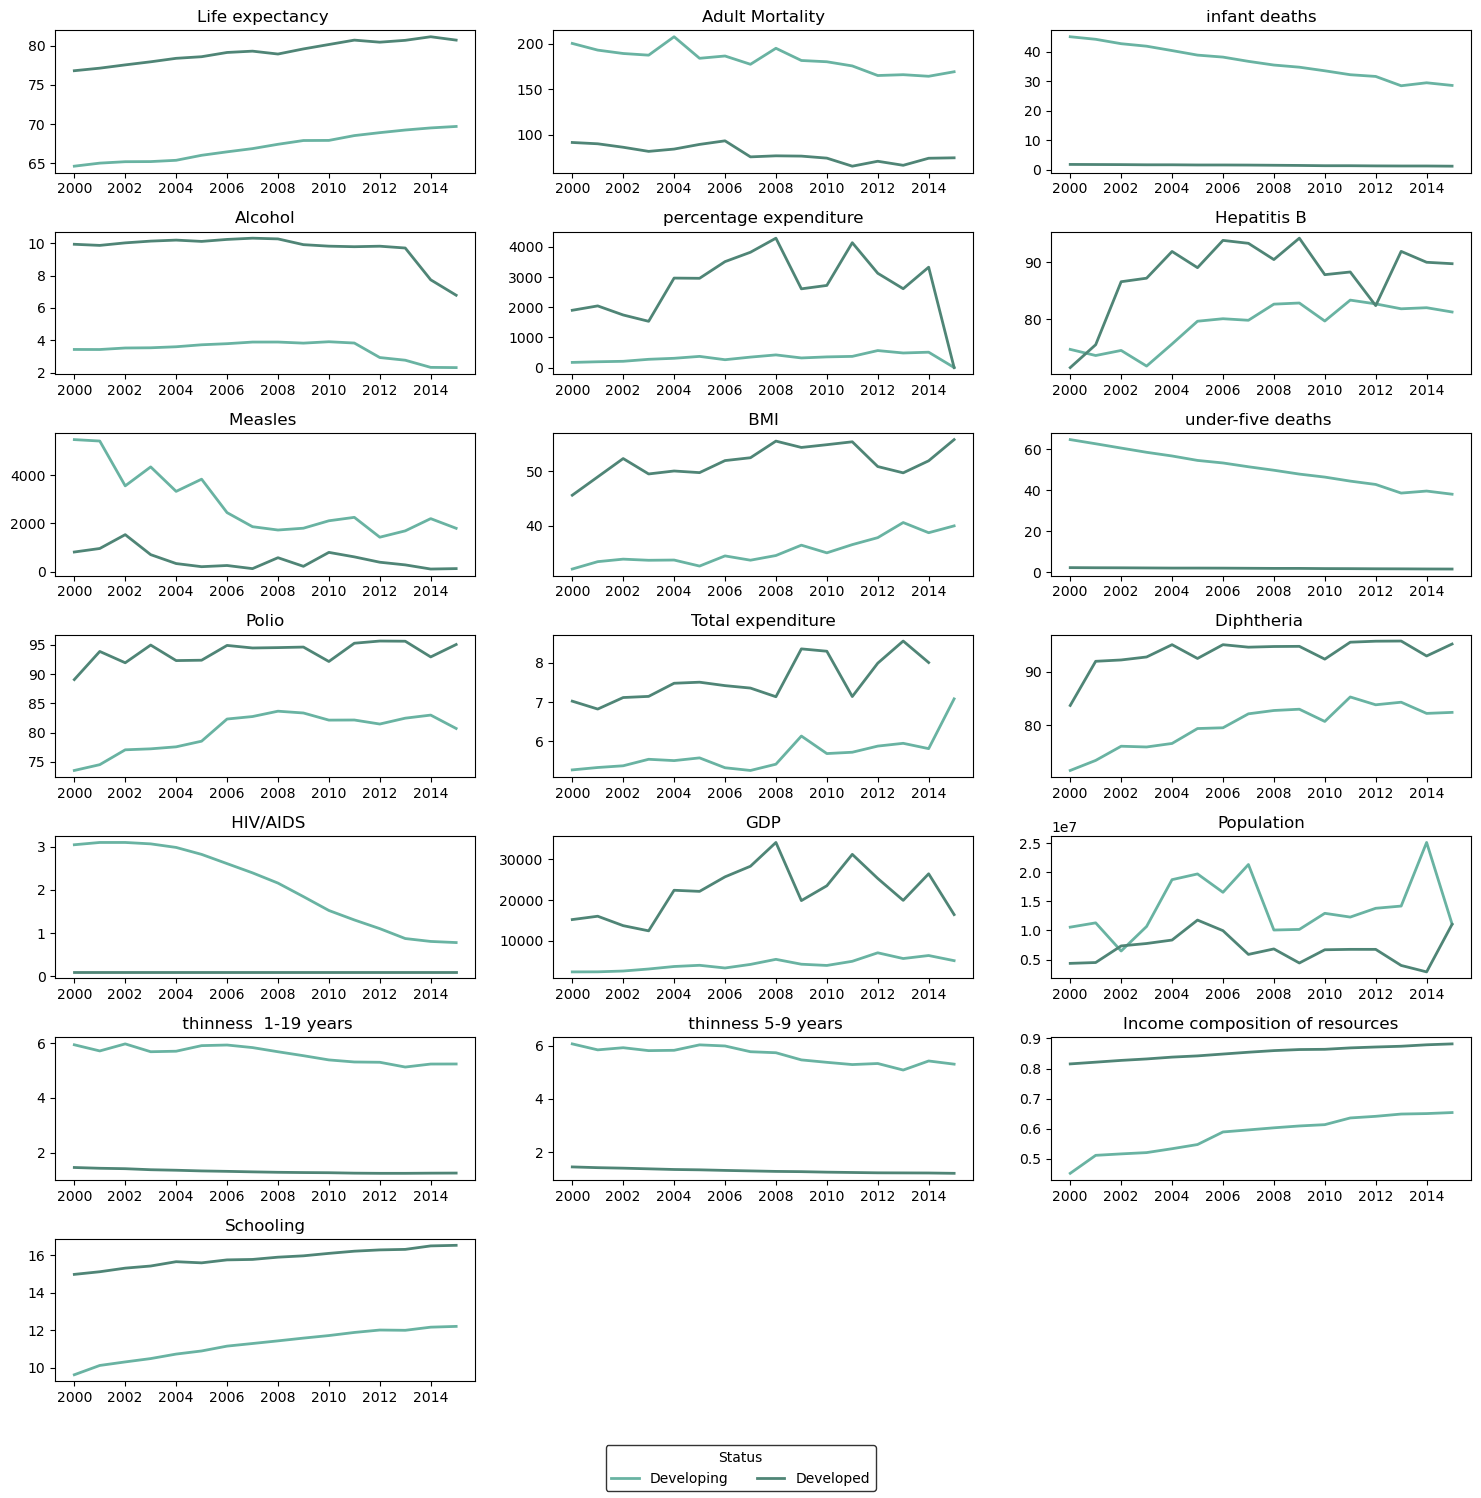

In [14]:
status_colors = {
    'Developing': '#69b3a2',   # основной
    'Developed':  '#4f8576'    # более тёмный вариант
}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for status in df['Status'].unique():
        status_data = (
            df[df['Status'] == status]
            .groupby('Year')[col]
            .mean()
            .reset_index()
        )
        axes[i].plot(status_data['Year'], status_data[col],
                     label=status,
                     color=status_colors[status],
                     linewidth=2)
    axes[i].set_title(col)

# Убираем лишние пустые оси
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

# Общая легенда снизу
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Status',
           loc='lower center', ncol=len(status_colors),
           frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout(rect=[0, 0.05, 1, 1])  # оставляем место снизу под легенду
plt.show()

### Getting last year

In order to support indepency of values, we are reducing time series dependency by choosing only one year - 2014. The model I'm building is simple, so we are also getting rid of empty values.

In [15]:
df_2014 = df[df['Year'] == 2014].dropna()

In [16]:
df_2014

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
49,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
81,Argentina,2014,Developing,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,Uruguay,2014,Developing,76.8,117.0,0,6.03,463.639782,95.0,0,63.4,0,95.0,8.58,95.0,0.1,16737.898270,3419546.0,1.5,1.4,0.791,15.5
2827,Uzbekistan,2014,Developing,69.2,184.0,16,0.01,0.442802,99.0,8,43.9,18,99.0,5.84,99.0,0.1,25.448414,37577.0,3.0,3.1,0.690,12.1
2843,Vanuatu,2014,Developing,71.7,134.0,0,0.01,564.816704,64.0,10,52.5,0,65.0,5.20,64.0,0.1,3148.365130,25885.0,1.5,1.4,0.596,10.8
2907,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,22.8,41,78.0,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5


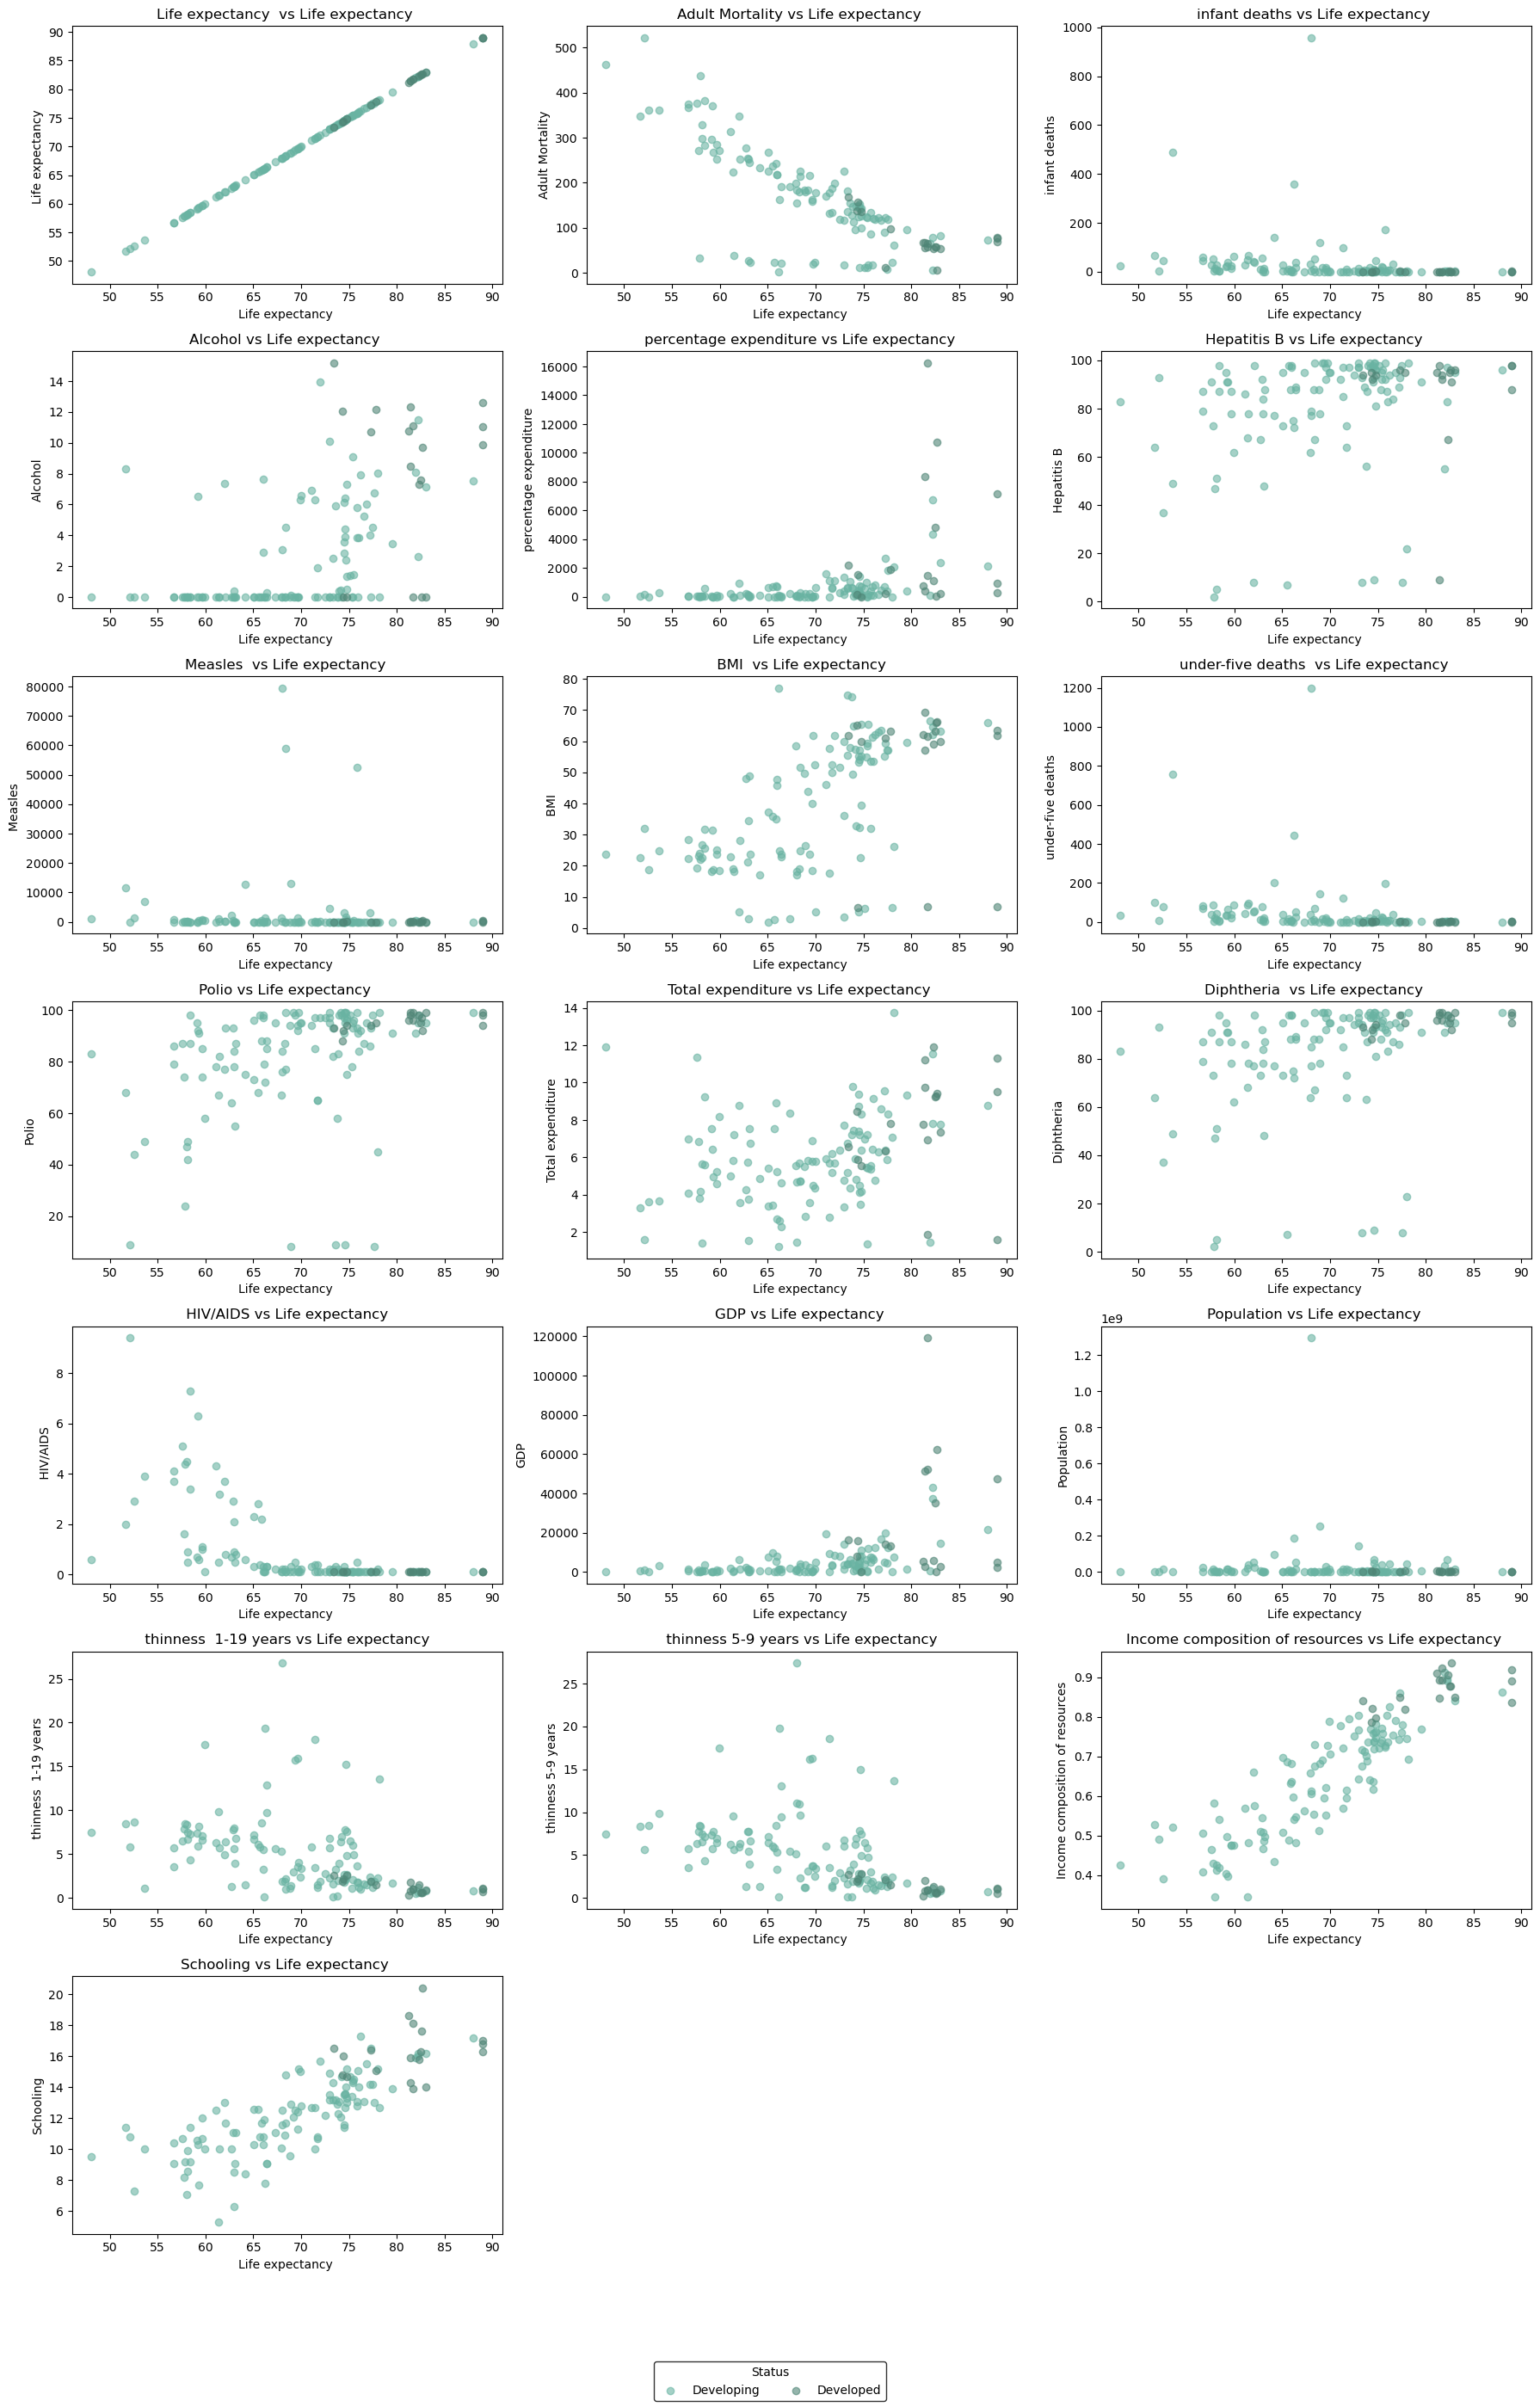

In [17]:
import math
x_col = 'Life expectancy '
#numeric_cols = numerical_cols.remove(x_col)

# Colors for Status
status_colors = {
    'Developing': '#69b3a2',
    'Developed': '#4f8576'
}

ncols = 3
nrows = math.ceil(len(numerical_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

# Loop through other numeric columns and plot scatter
for i, col in enumerate(numerical_cols):
    for status in df_2014['Status'].unique():
        subset = df_2014[df_2014['Status'] == status]
        axes[i].scatter(subset[x_col], subset[col],
                        label=status,
                        color=status_colors[status],
                        alpha=0.6)
    axes[i].set_title(f'{col} vs {x_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(col)

# Hide unused subplots if any
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

# One shared legend at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Status',
           loc='lower center', ncol=len(status_colors),
           frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

We have some strong linear correlation to life expactancy in data:
- schooling
- income composition
- adult morality

We also have correlation but not linear in following columns:
- GDP
- HIV/AIDS
- percentage expenditure

As I'm interested in GDP feature, I'll try to apply logarifm to the feature and see how will this affect our scatter plot.

In [18]:
df_2014['GDP_log'] = np.log(df_2014['GDP'])

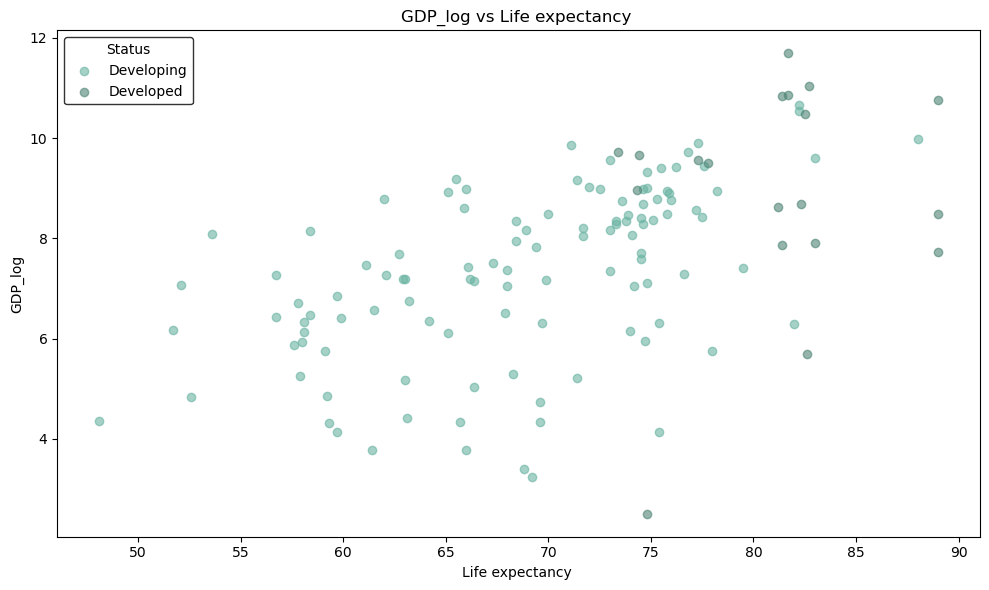

In [19]:
y_col = 'GDP_log'

fig, ax = plt.subplots(figsize=(10, 6))

for status in df_2014['Status'].unique():
    subset = df_2014[df_2014['Status'] == status]
    ax.scatter(subset[x_col], subset[y_col],
               label=status,
               color=status_colors[status],
               alpha=0.6)

ax.set_title(f'{y_col} vs {x_col}')
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)

ax.legend(title='Status', frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()

The correlation became stronger once we applied logarifm to the feature.

Now we need to apply Kolmogorov-Smirnov test to see if our feautres are normally spreaded.

In [20]:
data = df_2014['GDP_log']

# Option 1: test against a standard normal (mean=0, std=1)
stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))

print(f"K-S Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("Fail to reject H0: data looks normally distributed")
else:
    print("Reject H0: data is not normally distributed")

K-S Statistic: 0.0795516059815724
P-value: 0.3594108104274504
Fail to reject H0: data looks normally distributed


In [21]:
data = df_2014['Life expectancy ']

# Option 1: test against a standard normal (mean=0, std=1)
stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))

print(f"K-S Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("Fail to reject H0: data looks normally distributed")
else:
    print("Reject H0: data is not normally distributed")

K-S Statistic: 0.10195842446719128
P-value: 0.1223944471177647
Fail to reject H0: data looks normally distributed


Ideally it hast to be normally spreaded but our goal is to understand each step of the building simple linear model.

## Building model

So our hypothesis is following:

$$Life Expectancy = \beta + \beta_1{LN('GDP')} + e$$

It means we are trying to predict Life Expectancy ($y$) with our logarithmated feature GDP ($x$).

In [22]:
def beta_1(x, y):
    """
    Calculate β1 (slope) using the OLS formula:
    β1 = sum((xi - x̄)(yi - ȳ)) / sum((xi - x̄)^2)
    """
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    numerator = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    denominator = sum((x_i - x_mean) ** 2 for x_i in x)

    return numerator / denominator

def beta_0(x, y, b1):
    """
    Calculate β0 (intercept) using the formula:
    β0 = ȳ - β1 * x̄
    """
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    return y_mean - b1 * x_mean
    
def predict(x, b0, b1):
    """
    Generate predicted values based on coefficients:
    ŷ = b0 + b1 * xi for each xi
    """
    return [b0 + b1 * x_i for x_i in x]

def residuals(y, y_hat):
    """
    Calculate residuals for each observation:
    e_i = y_i - ŷ_i
    """
    return [y_i - y_hat_i for y_i, y_hat_i in zip(y, y_hat)]
    
def fit(x, y):
    """
    Main wrapper:
    - calculates β0, β1
    - generates predictions
    - calculates residuals
    Returns: (β0, β1, y_hat, e)
    """
    # ---- basic validation ----
    if len(x) != len(y) or len(x) < 2:
        raise ValueError("x and y must have the same length and length must be >= 2.")
        
    # Check variance in x to avoid division by zero in β1
    x_mean = sum(x) / len(x)
    denom = sum((x_i - x_mean) ** 2 for x_i in x)
    if denom == 0:
        raise ValueError("Zero variance in x (all x are equal); β1 is undefined.")

    # ---- estimation + outputs ----
    b1 = beta_1(x, y)
    b0 = beta_0(x, y, b1)
    y_hat = predict(x, b0, b1)
    e = residuals(y, y_hat)
    return b0, b1, y_hat, e

## Testing our model

In [23]:
def sse(res):
    """SSE = sum(e_i^2)"""
    return sum((e_i ** 2) for e_i in res)

def sst(y):
    """SST = sum((y_i - ȳ)^2)"""
    n = len(y)
    if n == 0:
        raise ValueError("y must be non-empty.")
    y_mean = sum(y) / n
    return sum((y_i - y_mean) ** 2 for y_i in y)

def r2(y, res):
    """R^2 = 1 - SSE/SST"""
    sse_val = sse(res)
    sst_val = sst(y)
    if sst_val == 0:
        # All y are identical -> R^2 undefined; return 0 by convention
        return 0.0
    return 1.0 - sse_val / sst_val

def mse(res, x):
    """s^2 = SSE / dof, where dof = n - 2 for simple regression"""
    n = len(x)
    if n < 3:
        raise ValueError("At least 3 observations are required (n-2 in denominator).")
    sse_val = sse(res)
    dof = n - 2
    return sse_val / dof

def se_beta1(x, s2):
    """
    SE_β1 = sqrt( s^2 / sum((x_i - x̄)^2) )
    """
    n = len(x)
    if n == 0:
        raise ValueError("x must be non-empty.")
    x_mean = sum(x) / n
    ssx = sum((x_i - x_mean) ** 2 for x_i in x)
    if ssx == 0:
        raise ValueError("Zero variance in x; SE_beta1 is undefined.")
    return math.sqrt(s2 / ssx)

def t_stat(value, se):
    """t = value / SE(value)"""
    if se == 0:
        raise ValueError("Standard error is zero; t-statistic is undefined.")
    return value / se

def se_beta0(x, s2):
    """
    SE_β0 = sqrt( s^2 * ( 1/n + x̄^2 / sum((x_i - x̄)^2) ) )
    """
    n = len(x)
    if n == 0:
        raise ValueError("x must be non-empty.")
    x_mean = sum(x) / n
    ssx = sum((x_i - x_mean) ** 2 for x_i in x)
    if ssx == 0:
        raise ValueError("Zero variance in x; SE_beta0 is undefined.")
    return math.sqrt(s2 * (1.0 / n + (x_mean ** 2) / ssx))

def f_stat(ssr_val, sse_val, df1, df2):
    """
    F = (SSR/df1) / (SSE/df2); for one regressor df1 = 1, df2 = n - 2
    """
    if df1 <= 0 or df2 <= 0:
        raise ValueError("Degrees of freedom must be positive.")
    if sse_val == 0 and ssr_val == 0:
        return 0.0
    if sse_val == 0:
        # Perfect fit -> infinite F in theory
        return float("inf")
    return (ssr_val / df1) / (sse_val / df2)

def durbin_watson(res):
    """
    DW = sum((e_i - e_{i-1})^2) / sum(e_i^2), i=1..n-1
    """
    n = len(res)
    if n < 2:
        raise ValueError("At least 2 residuals are required for Durbin–Watson.")
    numerator = sum((res[i] - res[i - 1]) ** 2 for i in range(1, n))
    denominator = sum(e ** 2 for e in res)
    if denominator == 0:
        return 0.0
    return numerator / denominator

def ks_test_normality(res):
    """
    One-sample Kolmogorov–Smirnov test of residuals vs Normal(mu, sigma),
    where mu and sigma are estimated from the residuals.

    Returns:
        D (float): KS statistic
        p_value (float): p-value from scipy.stats.kstest
        mu (float): estimated mean of residuals
        sigma (float): estimated std (population, ddof=0)

    Note:
    Classical KS assumes known (not estimated) parameters. When mu/sigma are
    estimated from the data, consider Lilliefors (statsmodels) for adjusted p-values.
    """
    n = len(res)
    if n == 0:
        raise ValueError("Residuals must be non-empty.")

    mu = float(np.mean(res))
    sigma = float(np.std(res, ddof=0))

    if sigma == 0.0:
        # Degenerate case: all residuals identical
        return 1.0, 0.0, mu, sigma

    D, p_value = stats.kstest(res, 'norm', args=(mu, sigma))
    return D, p_value, mu, sigma


## Checking results

In [24]:
# Extract feature (X) and target (Y) from DataFrame
x = df_2014['GDP_log'].tolist()
y = df_2014['Life expectancy '].tolist()

# 1. Fit the model
b0, b1, y_hat, e = fit(x, y)

print("β0 (intercept):", b0)
print("β1 (slope):", b1)

# 2. Model performance metrics
print("SSE:", sse(e))           # Sum of Squared Errors
print("SST:", sst(y))           # Total Sum of Squares
print("R²:", r2(y, e))          # Coefficient of determination
print("MSE:", mse(e, x))        # Mean Squared Error

# 3. Standard errors and t-statistics
s2 = mse(e, x)                  # Estimated variance
se_b1 = se_beta1(x, s2)         # Standard error for β1
se_b0 = se_beta0(x, s2)         # Standard error for β0

print("SE β1:", se_b1)
print("SE β0:", se_b0)
print("t-stat β1:", t_stat(b1, se_b1))
print("t-stat β0:", t_stat(b0, se_b0))

# 4. Regression sum of squares and F-statistic
ssr_val = sst(y) - sse(e)       # SSR = SST - SSE
df1 = 1                         # Degrees of freedom for regression
df2 = len(x) - 2                 # Degrees of freedom for residuals
print("SSR:", ssr_val)
print("F-stat:", f_stat(ssr_val, sse(e), df1, df2))

# 5. Durbin–Watson statistic for autocorrelation in residuals
print("Durbin–Watson:", durbin_watson(e))

# 6. Kolmogorov–Smirnov test for normality of residuals
D, p_value, mu, sigma = ks_test_normality(e)
print(f"KS test: D={D:.4f}, p-value={p_value:.4f}, mu={mu:.4f}, sigma={sigma:.4f}")


β0 (intercept): 51.57060065601463
β1 (slope): 2.5098178117749192
SSE: 6758.095798085605
SST: 9626.488396946565
R²: 0.2979687379845374
MSE: 52.388339520043445
SE β1: 0.3391877954295655
SE β0: 2.6378096484204696
t-stat β1: 7.399493276567785
t-stat β0: 19.55053909477331
SSR: 2868.39259886096
F-stat: 54.75250074997187
Durbin–Watson: 2.2026423709836824
KS test: D=0.0708, p-value=0.5042, mu=-0.0000, sigma=7.1825


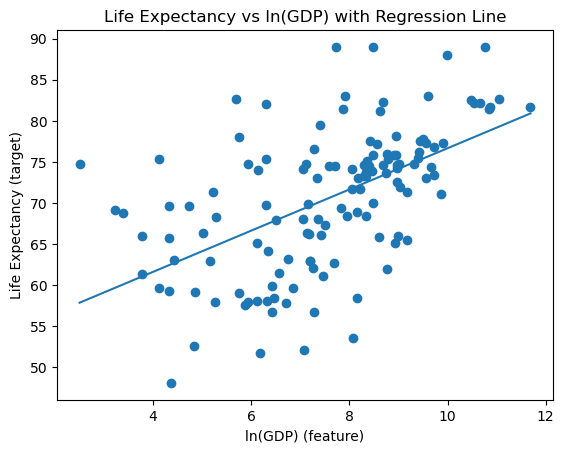

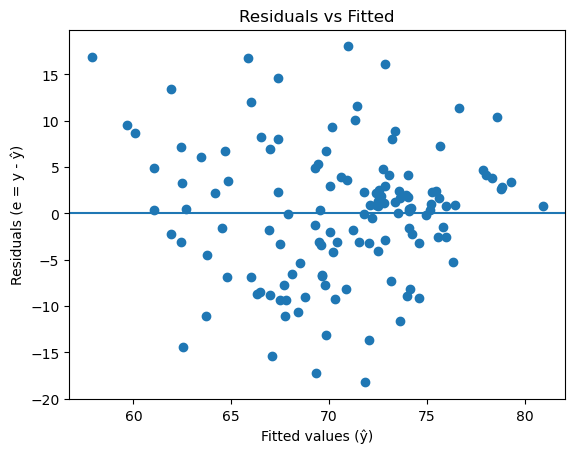

In [25]:
# Prepare a smooth line over the observed x-range
x_arr = np.asarray(x)
x_line = np.linspace(x_arr.min(), x_arr.max(), 200)
y_line = b0 + b1 * x_line

plt.figure()
plt.scatter(x, y)                          # raw data
plt.plot(x_line, y_line)                   # regression line
plt.xlabel("ln(GDP) (feature)")
plt.ylabel("Life Expectancy (target)")
plt.title("Life Expectancy vs ln(GDP) with Regression Line")
plt.show()

# 2) Residuals vs fitted
y_hat_arr = np.asarray(y_hat)
e_arr = np.asarray(e)

plt.figure()
plt.scatter(y_hat_arr, e_arr)              # residuals vs predictions
plt.axhline(0)                              # reference line at zero
plt.xlabel("Fitted values (ŷ)")
plt.ylabel("Residuals (e = y - ŷ)")
plt.title("Residuals vs Fitted")
plt.show()